In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pdb
import matplotlib.gridspec as gridspec
from pylab import *
from matplotlib.colors import LinearSegmentedColormap

In [3]:
def linear(df,level):
    x = [0,11]
    y = [0,df[str(level)][11]]
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_axis = np.arange(0,11)
    y_axis = polynomial(x_axis)
    return(y_axis)

In [10]:
znu = np.array([1009.7593   , 1004.12976  ,  997.94244  ,  987.29205  ,
        975.9316   ,  964.26685  ,  952.3993   ,  940.78534  ,
        929.12054  ,  917.5066   ,  906.39966  ,  895.7494   ,
        879.5708   ,  857.8643   ,  837.1722   ,  816.93634  ,
        796.70056  ,  776.46484  ,  756.73627  ,  737.5655   ,
        718.85126  ,  700.64417  ,  682.9442   ,  665.7514   ,
        648.5586   ,  631.36584  ,  614.73096  ,  598.806    ,
        583.13477  ,  567.71704  ,  552.55286  ,  537.64233  ,
        512.8421   ,  478.71008  ,  446.0996   ,  415.26413  ,
        386.45734  ,  359.17203  ,  333.15466  ,  308.8616   ,
        286.09003  ,  264.33276  ,  243.94487  ,  225.02774  ,
        207.27705  ,  190.49     ,  174.76799  ,  160.11101  ,
        146.36691  ,  133.58644  ,  121.566696 ,  110.459854 ,
         95.44786  ,   77.49433  ,   62.178047 ,   49.093273 ,
         37.986427 ,   28.502497 ,   20.641489 ,   14.149816 ,
          8.621753 ,    3.0429711])


In [4]:
mdir = '/Users/acasalla/Documents/PhD/Thesis/Idealized/'
sta = 2
end = 5
nx=256
ny=256
nz=62
npts=nx*ny # hardwired for moment
hovchunk=1024  #1024 # averaging length for chunking, power of 2, larger=smoother.
nhov=int(npts/hovchunk)
hovx=100*(np.arange(nhov)+0.5)/nhov

runs = ['ThoYSU','ThoBL','GCEYSU','GCEBL','ThoTYSU','ThoTBL','GCETYSU','GCETBL']
fluxes = ['lw','lwc','lwcl','sw','swc','swcl']
sflevs = [-72,-36,-24,-16,-8,-4,-2,-1,-0.05,0.05,1,2,4,8,16,24,36,72]
qllevs = [0.2,0.4,0.6,0.8,1]
#sflevs = [-30,-25,-20,-16,-12,-8,-6,-4,-2,-1,0,1,2,4,6,8,12,16,20,25,30]
title = ['(a) Q$_{rad}$ LW net','(b) Q$_{rad}$ LW Clear-sky','(c) Q$_{rad}$ LW CRE',
         '(d) Q$_{rad}$ SW net','(e) Q$_{rad}$ SW Clear-sky','(f) Q$_{rad}$ SW CRE']

# Anomalies

# LW

In [5]:
stas = [2,2,10,15,35]
ends = [5,7,15,20,40]
fluxes = ['lw','lwc','lwcl']
#titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
title = ['Q$_{rad}$ LW net','Q$_{rad}$ LW Clear-sky','Q$_{rad}$ LW CRE']
runi = ['Tho-SM2-YSU','Tho-SM2-BL','GCE-SM2-YSU','GCE-SM2-BL',
        'Tho-TKE-YSU','Tho-TKE-BL','GCE-TKE-YSU','GCE-TKE-BL']
color = ['darkblue','darkred']*4

for ll,sta in enumerate(stas):
    fig = plt.figure(figsize=(10,20))
    gs = GridSpec(10,3,left = 0.09, right = 0.98, hspace=0.2, wspace=0.1, top = 0.92, bottom = 0.08, 
                  height_ratios = [1,1,1,1,1,1,1,1,0.01,0.1])
    count = 0
    for j,run in enumerate(runs):
        for i,flux in enumerate(fluxes):
            #pdb.set_trace()
            df = pd.read_csv(mdir+'circulation/'+run+'_'+flux+'_'+str(sta)+'_'+str(ends[ll])+'.csv')
            df = df.drop('Unnamed: 0', axis = 1)
            cdf = pd.read_csv(mdir+'circulation_Qrad/'+run+'_c'+flux+'_Qrad_'+str(sta)+'_'+str(ends[ll])+'.csv')
            cdf = cdf.drop('Unnamed: 0', axis = 1)
            qldf = pd.read_csv(mdir+'circulation/'+run+'_ql_'+str(sta)+'_'+str(ends[ll])+'.csv')
            qldf = qldf.drop('Unnamed: 0', axis = 1)
            cdf[0:1] = 0
            for k in np.arange(0,len(hovx)):
                cdf[str(k)][0:11] = linear(cdf,k)
            ax = plt.subplot(gs[count]) 
            im = plt.contourf(hovx, np.array(znu), np.array(df)*86400, cmap = 'bwr', 
                              levels = np.arange(-0.4,0.41,0.04), extend = 'both')
            cssf = plt.contour(hovx,np.array(znu),np.array(cdf)*60*100, colors = 'k', 
                               levels = np.array(sflevs), linewidths = 0.5) 
            plt.clabel(cssf, fontsize=8, inline=1,fmt = '%1.2f', levels = sflevs)
            if i==0 or i == 2:
                qlsf = plt.contour(hovx, np.array(znu),np.array(qldf)*1e5, linewidths = 0.5, colors = 'purple', 
                                   levels = qllevs)
                plt.clabel(qlsf, fontsize=8, inline=1,fmt = '%1.2f', levels = qllevs)
            plt.ylim(1000,870)
            if j == 0:
                plt.title(title[i])
            if i == 0:
                plt.ylabel(runi[j]+' \n Pressure (hPa)', color = color[j])
            else:
                ax.yaxis.set_major_formatter(NullFormatter())
            if count > 20:
                plt.xlabel('TCWV %-tile')
            else : 
                ax.xaxis.set_major_formatter(NullFormatter())
            count = count + 1

    ax = plt.subplot(gs[9,0:])
    cbar = plt.colorbar(im, cax = ax, orientation = 'horizontal')
    cbar.set_label('K day$^{-1}$')
    plt.savefig(mdir+'plots/All_PBL_LW_rad_cooling_'+str(sta)+'_'+str(ends[ll])+'.jpg',
                    bbox_inches = 'tight', dpi = 300)
    plt.savefig(mdir+'plots/All_PBL_LW_rad_cooling_'+str(sta)+'_'+str(ends[ll])+'.pdf', 
                    bbox_inches = 'tight', dpi = 300)
    #plt.show()
    plt.close()

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cdf[str(k)][0:11] = linear(cdf,k)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/3317012453.py

# SW

In [ ]:
stas = [2,2,10,15,35]
ends = [5,7,15,20,40]
fluxes = ['sw','swc','swcl']
#titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
title = ['Q$_{rad}$ SW net','Q$_{rad}$ SW Clear-sky','Q$_{rad}$ SW CRE']
runi = ['Tho-SM2-YSU','Tho-SM2-BL','GCE-SM2-YSU','GCE-SM2-BL',
        'Tho-TKE-YSU','Tho-TKE-BL','GCE-TKE-YSU','GCE-TKE-BL']
color = ['darkblue','darkred']*4

for ll,sta in enumerate(stas):
    fig = plt.figure(figsize=(10,20))
    gs = GridSpec(10,3,left = 0.09, right = 0.98, hspace=0.2, wspace=0.1, top = 0.92, bottom = 0.08, 
                  height_ratios = [1,1,1,1,1,1,1,1,0.01,0.1])
    count = 0
    for j,run in enumerate(runs):
        for i,flux in enumerate(fluxes):
            #pdb.set_trace()
            df = pd.read_csv(mdir+'circulation/'+run+'_'+flux+'_'+str(sta)+'_'+str(ends[ll])+'.csv')
            df = df.drop('Unnamed: 0', axis = 1)
            cdf = pd.read_csv(mdir+'circulation_Qrad/'+run+'_c'+flux+'_Qrad_'+str(sta)+'_'+str(ends[ll])+'.csv')
            cdf = cdf.drop('Unnamed: 0', axis = 1)
            qldf = pd.read_csv(mdir+'circulation/'+run+'_ql_'+str(sta)+'_'+str(ends[ll])+'.csv')
            qldf = qldf.drop('Unnamed: 0', axis = 1)
            cdf[0:1] = 0
            for k in np.arange(0,len(hovx)):
                cdf[str(k)][0:11] = linear(cdf,k)
            ax = plt.subplot(gs[count]) 
            im = plt.contourf(hovx, np.array(znu), np.array(df)*86400, cmap = 'bwr', 
                              levels = np.arange(-0.4,0.41,0.04), extend = 'both')
            cssf = plt.contour(hovx,np.array(znu),np.array(cdf)*60*24*100, colors = 'k', 
                               levels = np.array(sflevs), linewidths = 0.5) 
            plt.clabel(cssf, fontsize=8, inline=1,fmt = '%1.2f', levels = sflevs)
            if i==0 or i == 2:
                qlsf = plt.contour(hovx, np.array(znu),np.array(qldf)*1e5, linewidths = 0.5, colors = 'purple', 
                                   levels = qllevs)
                plt.clabel(qlsf, fontsize=8, inline=1,fmt = '%1.2f', levels = qllevs)
            plt.ylim(1000,870)
            if j == 0:
                plt.title(title[i])
            if i == 0:
                plt.ylabel(runi[j]+' \n Pressure (hPa)', color = color[j])
            else:
                ax.yaxis.set_major_formatter(NullFormatter())
            if count > 20:
                plt.xlabel('TCWV %-tile')
            else : 
                ax.xaxis.set_major_formatter(NullFormatter())
            count = count + 1

    ax = plt.subplot(gs[9,0:])
    cbar = plt.colorbar(im, cax = ax, orientation = 'horizontal')
    cbar.set_label('K day$^{-1}$')
    plt.savefig(mdir+'plots/All_PBL_SW_rad_cooling_'+str(sta)+'_'+str(ends[ll])+'.jpg',
                    bbox_inches = 'tight', dpi = 300)
    plt.savefig(mdir+'plots/All_PBL_SW_rad_cooling_'+str(sta)+'_'+str(ends[ll])+'.pdf', 
                    bbox_inches = 'tight', dpi = 300)
    #plt.show()
    plt.close()

## No circulation

## LW

In [ ]:
stas = [2,2,10,15,35]
ends = [5,7,15,20,40]
fluxes = ['lw','lwc','lwcl']
#titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
title = ['Q$_{rad}$ LW net','Q$_{rad}$ LW Clear-sky','Q$_{rad}$ LW CRE']
runi = ['Tho-SM2-YSU','Tho-SM2-BL','GCE-SM2-YSU','GCE-SM2-BL',
        'Tho-TKE-YSU','Tho-TKE-BL','GCE-TKE-YSU','GCE-TKE-BL']
color = ['darkblue','darkred']*4

for ll,sta in enumerate(stas):
    fig = plt.figure(figsize=(10,20))
    gs = GridSpec(10,3,left = 0.09, right = 0.98, hspace=0.2, wspace=0.1, top = 0.92, bottom = 0.08, 
                  height_ratios = [1,1,1,1,1,1,1,1,0.01,0.1])
    count = 0
    for j,run in enumerate(runs):
        for i,flux in enumerate(fluxes):
            #pdb.set_trace()
            df = pd.read_csv(mdir+'circulation/'+run+'_'+flux+'_'+str(sta)+'_'+str(ends[ll])+'.csv')
            df = df.drop('Unnamed: 0', axis = 1)
            cdf = pd.read_csv(mdir+'circulation/'+run+'_c'+flux+'_'+str(sta)+'_'+str(ends[ll])+'.csv')
            cdf = cdf.drop('Unnamed: 0', axis = 1)
            qldf = pd.read_csv(mdir+'circulation/'+run+'_ql_'+str(sta)+'_'+str(ends[ll])+'.csv')
            qldf = qldf.drop('Unnamed: 0', axis = 1)
            cdf[0:1] = 0
            for k in np.arange(0,len(hovx)):
                cdf[str(k)][0:11] = linear(cdf,k)
            ax = plt.subplot(gs[count]) 
            im = plt.contourf(hovx, np.array(znu), np.array(df)*86400, cmap = 'bwr', 
                              levels = np.arange(-0.4,0.41,0.04), extend = 'both')
            if i==0 or i == 2:
                qlsf = plt.contour(hovx, np.array(znu),np.array(qldf)*1e5, linewidths = 0.5, colors = 'purple', 
                                   levels = qllevs)
                plt.clabel(qlsf, fontsize=8, inline=1,fmt = '%1.2f', levels = qllevs)
            plt.ylim(1000,870)
            if j == 0:
                plt.title(title[i])
            if i == 0:
                plt.ylabel(runi[j]+' \n Pressure (hPa)', color = color[j])
            else:
                ax.yaxis.set_major_formatter(NullFormatter())
            if count > 20:
                plt.xlabel('TCWV %-tile')
            else : 
                ax.xaxis.set_major_formatter(NullFormatter())
            count = count + 1

    ax = plt.subplot(gs[9,0:])
    cbar = plt.colorbar(im, cax = ax, orientation = 'horizontal')
    cbar.set_label('K day$^{-1}$')
    plt.savefig(mdir+'plots/All_PBL_LW_rad_cooling_no_circ_'+str(sta)+'_'+str(ends[ll])+'.jpg',
                    bbox_inches = 'tight', dpi = 300)
    plt.savefig(mdir+'plots/All_PBL_LW_rad_cooling_no_circ_'+str(sta)+'_'+str(ends[ll])+'.pdf', 
                    bbox_inches = 'tight', dpi = 300)
    #plt.show()
    plt.close()

# SW

In [ ]:
stas = [2,2,10,15,35]
ends = [5,7,15,20,40]
fluxes = ['sw','swc','swcl']
#titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
title = ['Q$_{rad}$ SW net','Q$_{rad}$ SW Clear-sky','Q$_{rad}$ SW CRE']
runi = ['Tho-SM2-YSU','Tho-SM2-BL','GCE-SM2-YSU','GCE-SM2-BL',
        'Tho-TKE-YSU','Tho-TKE-BL','GCE-TKE-YSU','GCE-TKE-BL']
color = ['darkblue','darkred']*4

for ll,sta in enumerate(stas):
    fig = plt.figure(figsize=(10,20))
    gs = GridSpec(10,3,left = 0.09, right = 0.98, hspace=0.2, wspace=0.1, top = 0.92, bottom = 0.08, 
                  height_ratios = [1,1,1,1,1,1,1,1,0.01,0.1])
    count = 0
    for j,run in enumerate(runs):
        for i,flux in enumerate(fluxes):
            #pdb.set_trace()
            df = pd.read_csv(mdir+'circulation/'+run+'_'+flux+'_'+str(sta)+'_'+str(ends[ll])+'.csv')
            df = df.drop('Unnamed: 0', axis = 1)
            cdf = pd.read_csv(mdir+'circulation/'+run+'_c'+flux+'_'+str(sta)+'_'+str(ends[ll])+'.csv')
            cdf = cdf.drop('Unnamed: 0', axis = 1)
            qldf = pd.read_csv(mdir+'circulation/'+run+'_ql_'+str(sta)+'_'+str(ends[ll])+'.csv')
            qldf = qldf.drop('Unnamed: 0', axis = 1)
            cdf[0:1] = 0
            for k in np.arange(0,len(hovx)):
                cdf[str(k)][0:11] = linear(cdf,k)
            ax = plt.subplot(gs[count]) 
            im = plt.contourf(hovx, np.array(znu), np.array(df)*86400, cmap = 'bwr', 
                              levels = np.arange(-0.4,0.41,0.04), extend = 'both')
            if i==0 or i == 2:
                qlsf = plt.contour(hovx, np.array(znu),np.array(qldf)*1e5, linewidths = 0.5, colors = 'purple', 
                                   levels = qllevs)
                plt.clabel(qlsf, fontsize=8, inline=1,fmt = '%1.2f', levels = qllevs)
            plt.ylim(1000,870)
            if j == 0:
                plt.title(title[i])
            if i == 0:
                plt.ylabel(runi[j]+' \n Pressure (hPa)', color = color[j])
            else:
                ax.yaxis.set_major_formatter(NullFormatter())
            if count > 20:
                plt.xlabel('TCWV %-tile')
            else : 
                ax.xaxis.set_major_formatter(NullFormatter())
            count = count + 1

    ax = plt.subplot(gs[9,0:])
    cbar = plt.colorbar(im, cax = ax, orientation = 'horizontal')
    cbar.set_label('K day$^{-1}$')
    plt.savefig(mdir+'plots/All_PBL_SW_rad_cooling_no_circ_'+str(sta)+'_'+str(ends[ll])+'.jpg',
                    bbox_inches = 'tight', dpi = 300)
    plt.savefig(mdir+'plots/All_PBL_SW_rad_cooling_no_circ_'+str(sta)+'_'+str(ends[ll])+'.pdf', 
                    bbox_inches = 'tight', dpi = 300)
    #plt.show()
    plt.close()

## Net

In [ ]:
stas = [2,2,10,15,35]
ends = [5,7,15,20,40]

for j,sta in enumerate(stas):
    fig = plt.figure(figsize=(8,16))
    gs = GridSpec(6,2,left = 0.09, right = 0.98, hspace=0.2, wspace=0.1, top = 0.92, bottom = 0.08, 
                  height_ratios = [1,1,1,1,0.01,0.1])
    titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
    runi = ['Tho-SM2-YSU','Tho-SM2-BL','GCE-SM2-YSU','GCE-SM2-BL',
            'Tho-TKE-YSU','Tho-TKE-BL','GCE-TKE-YSU','GCE-TKE-BL']
    for i,run in enumerate(runs):
        df = pd.read_csv(mdir+'/circulation/'+run+'_net_'+str(sta)+'_'+str(ends[j])+'.csv')
        df = df.drop('Unnamed: 0', axis = 1)
        cdf = pd.read_csv(mdir+'/circulation/'+run+'_cnet_'+str(sta)+'_'+str(ends[j])+'.csv')
        cdf = cdf.drop('Unnamed: 0', axis = 1)
        qldf = pd.read_csv(mdir+'circulation/'+run+'_ql_'+str(sta)+'_'+str(ends[j])+'.csv')
        qldf = qldf.drop('Unnamed: 0', axis = 1)
        cdf[0:1] = 0
        for k in np.arange(0,len(hovx)):
            cdf[str(k)][0:11] = linear(cdf,k)
        ax = plt.subplot(gs[i])
        im = plt.contourf(hovx, np.array(znu), np.array(df)*86400, cmap = 'bwr', 
                          levels = np.arange(-0.4,0.41,0.04), extend = 'both')
        qlsf = plt.contour(hovx, np.array(znu),np.array(qldf)*1e5, linewidths = 0.5, colors = 'purple', 
                           levels = qllevs)
        plt.clabel(qlsf, fontsize=8, inline=1,fmt = '%1.2f', levels = qllevs)
        plt.ylim(1000,870)
        plt.title(titles[i]+' '+runi[i], loc = 'left')
        if i == 0 or i == 2 or i == 4 or i == 6:
            plt.ylabel('Pressure (hPa)', fontsize =12)
            plt.yticks(fontsize=12)
        else:
            ax.yaxis.set_major_formatter(NullFormatter())
        if i > 5:
            plt.xlabel('TCWV %-tile', fontsize = 12)
            plt.xticks(fontsize=12)
        else: 
            ax.xaxis.set_major_formatter(NullFormatter())

    cax = plt.subplot(gs[5,0:])
    cbar = plt.colorbar(im, cax = cax, orientation = 'horizontal')
    cbar.set_label('K day$^{-1}$', fontsize = 12)
    cbar.ax.tick_params(labelsize=12)

    plt.savefig(mdir+'plots/All_PBL_NS_rad_cooling_no_circ_'+str(sta)+'_'+str(ends[j])+'.jpg',
                    bbox_inches = 'tight', dpi = 300)
    plt.savefig(mdir+'plots/All_PBL_NS_rad_cooling_no_circ_'+str(sta)+'_'+str(ends[j])+'.pdf', 
                    bbox_inches = 'tight', dpi = 300)
    #plt.show()
    plt.close()

# Full value

## LW

In [ ]:
stas = [2,2,10,15,35]
ends = [5,7,15,20,40]
fluxes = ['lw','lwc','lwcl']
#titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
title = ['Q$_{rad}$ LW net','Q$_{rad}$ LW Clear-sky','Q$_{rad}$ LW CRE']
runi = ['Tho-SM2-YSU','Tho-SM2-BL','GCE-SM2-YSU','GCE-SM2-BL',
        'Tho-TKE-YSU','Tho-TKE-BL','GCE-TKE-YSU','GCE-TKE-BL']
color = ['darkblue','darkred']*4

for ll,sta in enumerate(stas):
    fig = plt.figure(figsize=(10,20))
    gs = GridSpec(10,3,left = 0.09, right = 0.98, hspace=0.2, wspace=0.1, top = 0.92, bottom = 0.08, 
                  height_ratios = [1,1,1,1,1,1,1,1,0.01,0.1])
    count = 0
    for j,run in enumerate(runs):
        for i,flux in enumerate(fluxes):
            #pdb.set_trace()
            df = pd.read_csv(mdir+'circulation_Qrad/'+run+'_'+flux+'_Qrad_'+str(sta)+'_'+str(ends[ll])+'.csv')
            df = df.drop('Unnamed: 0', axis = 1)
            cdf = pd.read_csv(mdir+'circulation_Qrad/'+run+'_c'+flux+'_Qrad_'+str(sta)+'_'+str(ends[ll])+'.csv')
            cdf = cdf.drop('Unnamed: 0', axis = 1)
            qldf = pd.read_csv(mdir+'circulation/'+run+'_ql_'+str(sta)+'_'+str(ends[ll])+'.csv')
            qldf = qldf.drop('Unnamed: 0', axis = 1)
            cdf[0:1] = 0
            for k in np.arange(0,len(hovx)):
                cdf[str(k)][0:11] = linear(cdf,k)
            ax = plt.subplot(gs[count]) 
            im = plt.contourf(hovx, np.array(znu), np.array(df)*86400, levels = np.arange(-3.2,3.21,0.2),
                              cmap = 'bwr', extend = 'both')
            cssf = plt.contour(hovx,np.array(znu),np.array(cdf)*100*60, colors = 'k', linewidths = 0.5) 
            plt.clabel(cssf, fontsize=8, inline=1,fmt = '%1.2f')
            if i==0 or i == 2:
                qlsf = plt.contour(hovx, np.array(znu),np.array(qldf)*1e5, linewidths = 0.5, colors = 'purple', 
                                   levels = qllevs)
                plt.clabel(qlsf, fontsize=8, inline=1,fmt = '%1.2f', levels = qllevs)
            plt.ylim(1000,870)
            if j == 0:
                plt.title(title[i])
            if i == 0:
                plt.ylabel(runi[j]+' \n Pressure (hPa)', color = color[j])
            else:
                ax.yaxis.set_major_formatter(NullFormatter())
            if count > 20:
                plt.xlabel('TCWV %-tile')
            else : 
                ax.xaxis.set_major_formatter(NullFormatter())
            count = count + 1

    ax = plt.subplot(gs[9,0:])
    cbar = plt.colorbar(im, cax = ax, orientation = 'horizontal', ticks = np.arange(-3.2,3.21,0.4))
    cbar.set_label('K day$^{-1}$')
    plt.savefig(mdir+'plots/All_PBL_LW_rad_cooling_tot_'+str(sta)+'_'+str(ends[ll])+'.jpg',
                    bbox_inches = 'tight', dpi = 300)
    plt.savefig(mdir+'plots/All_PBL_LW_rad_cooling_tot_'+str(sta)+'_'+str(ends[ll])+'.pdf', 
                    bbox_inches = 'tight', dpi = 300)
    #plt.show()
    plt.close()

## SW

In [ ]:
stas = [2,2,10,15,35]
ends = [5,7,15,20,40]
fluxes = ['sw','swc','swcl']
#titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
title = ['Q$_{rad}$ SW net','Q$_{rad}$ SW Clear-sky','Q$_{rad}$ SW CRE']
runi = ['Tho-SM2-YSU','Tho-SM2-BL','GCE-SM2-YSU','GCE-SM2-BL',
        'Tho-TKE-YSU','Tho-TKE-BL','GCE-TKE-YSU','GCE-TKE-BL']
color = ['darkblue','darkred']*4

for ll,sta in enumerate(stas):
    fig = plt.figure(figsize=(10,20))
    gs = GridSpec(10,3,left = 0.09, right = 0.98, hspace=0.2, wspace=0.1, top = 0.92, bottom = 0.08, 
                  height_ratios = [1,1,1,1,1,1,1,1,0.01,0.1])
    count = 0
    for j,run in enumerate(runs):
        for i,flux in enumerate(fluxes):
            #pdb.set_trace()
            df = pd.read_csv(mdir+'circulation_Qrad/'+run+'_'+flux+'_Qrad_'+str(sta)+'_'+str(ends[ll])+'.csv')
            df = df.drop('Unnamed: 0', axis = 1)
            cdf = pd.read_csv(mdir+'circulation_Qrad/'+run+'_c'+flux+'_Qrad_'+str(sta)+'_'+str(ends[ll])+'.csv')
            cdf = cdf.drop('Unnamed: 0', axis = 1)
            qldf = pd.read_csv(mdir+'circulation/'+run+'_ql_'+str(sta)+'_'+str(ends[ll])+'.csv')
            qldf = qldf.drop('Unnamed: 0', axis = 1)
            cdf[0:1] = 0
            for k in np.arange(0,len(hovx)):
                cdf[str(k)][0:11] = linear(cdf,k)
            ax = plt.subplot(gs[count]) 
            im = plt.contourf(hovx, np.array(znu), np.array(df)*86400, cmap = 'bwr', 
                              levels = np.arange(-3.2,3.21,0.2), extend = 'both')
            cssf = plt.contour(hovx,np.array(znu),np.array(cdf)*60*100, colors = 'k', 
                               levels = np.array(sflevs), linewidths = 0.5) 
            plt.clabel(cssf, fontsize=8, inline=1,fmt = '%1.2f')
            if i==0 or i == 2:
                qlsf = plt.contour(hovx, np.array(znu),np.array(qldf)*1e5, linewidths = 0.5, colors = 'purple', 
                                   levels = qllevs)
                plt.clabel(qlsf, fontsize=8, inline=1,fmt = '%1.2f', levels = qllevs)
            plt.ylim(1000,870)
            if j == 0:
                plt.title(title[i])
            if i == 0:
                plt.ylabel(runi[j]+' \n Pressure (hPa)', color = color[j])
            else:
                ax.yaxis.set_major_formatter(NullFormatter())
            if count > 20:
                plt.xlabel('TCWV %-tile')
            else : 
                ax.xaxis.set_major_formatter(NullFormatter())
            count = count + 1

    ax = plt.subplot(gs[9,0:])
    cbar = plt.colorbar(im, cax = ax, orientation = 'horizontal', ticks = np.arange(-3.2,3.21,0.4))
    cbar.set_label('K day$^{-1}$')
    plt.savefig(mdir+'plots/All_PBL_SW_rad_cooling_tot_'+str(sta)+'_'+str(ends[ll])+'.jpg',
                    bbox_inches = 'tight', dpi = 300)
    plt.savefig(mdir+'plots/All_PBL_SW_rad_cooling_tot_'+str(sta)+'_'+str(ends[ll])+'.pdf', 
                    bbox_inches = 'tight', dpi = 300)
    #plt.show()
    plt.close()

## Net

In [ ]:
stas = [2,2,10,15,35]
ends = [5,7,15,20,40]
cmap=LinearSegmentedColormap.from_list('', ['royalblue','lightblue','white','orange','red'])


for j,sta in enumerate(stas):
    fig = plt.figure(figsize=(8,16))
    gs = GridSpec(6,2,left = 0.09, right = 0.98, hspace=0.2, wspace=0.1, top = 0.92, bottom = 0.08, 
                  height_ratios = [1,1,1,1,0.01,0.1])
    titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
    runi = ['Tho-SM2-YSU','Tho-SM2-BL','GCE-SM2-YSU','GCE-SM2-BL',
            'Tho-TKE-YSU','Tho-TKE-BL','GCE-TKE-YSU','GCE-TKE-BL']
    for i,run in enumerate(runs):
        df = pd.read_csv(mdir+'/circulation_Qrad/'+run+'_net_Qrad_'+str(sta)+'_'+str(ends[j])+'.csv')
        df = df.drop('Unnamed: 0', axis = 1)
        cdf = pd.read_csv(mdir+'/circulation_Qrad/'+run+'_cnet_Qrad_'+str(sta)+'_'+str(ends[j])+'.csv')
        cdf = cdf.drop('Unnamed: 0', axis = 1)
        qldf = pd.read_csv(mdir+'circulation/'+run+'_ql_'+str(sta)+'_'+str(ends[j])+'.csv')
        qldf = qldf.drop('Unnamed: 0', axis = 1)
        cdf[0:1] = 0
        for k in np.arange(0,len(hovx)):
            cdf[str(k)][0:11] = linear(cdf,k)
        ax = plt.subplot(gs[i])
        im = plt.contourf(hovx, np.array(znu), np.array(df)*86400, cmap = cmap, 
                          levels = np.arange(-2.8,2.81,0.2), extend = 'both')
        cssf = plt.contour(hovx,np.array(znu),np.array(cdf)*60*100*24, colors = 'k', 
                           levels = np.arange(-120,120.1,15), linewidths = 0.7)
        plt.clabel(cssf, fontsize=8, inline=1,fmt = '%1.2f')
        qlsf = plt.contour(hovx, np.array(znu),np.array(qldf)*1e5, linewidths = 0.5, colors = 'purple', 
                           levels = qllevs)
        plt.clabel(qlsf, fontsize=8, inline=1,fmt = '%1.2f', levels = qllevs)
        plt.ylim(1000,100)
        plt.title(titles[i]+' '+runi[i], loc = 'left')
        if i == 0 or i == 2 or i == 4 or i == 6:
            plt.ylabel('Pressure (hPa)', fontsize =12)
            plt.yticks(fontsize=12)
        else:
            ax.yaxis.set_major_formatter(NullFormatter())
        if i > 5:
            plt.xlabel('TCWV %-tile', fontsize = 12)
            plt.xticks(fontsize=12)
        else: 
            ax.xaxis.set_major_formatter(NullFormatter())

    cax = plt.subplot(gs[5,0:])
    cbar = plt.colorbar(im, cax = cax, orientation = 'horizontal', ticks = np.arange(-2.8,2.81,0.4))
    cbar.set_label('K day$^{-1}$', fontsize = 12)
    cbar.ax.tick_params(labelsize=12)

    plt.savefig(mdir+'plots/All_PBL_NS_rad_cooling_tot_'+str(sta)+'_'+str(ends[j])+'.jpg',
                    bbox_inches = 'tight', dpi = 300)
    plt.savefig(mdir+'plots/All_PBL_NS_rad_cooling_tot_'+str(sta)+'_'+str(ends[j])+'.pdf', 
                    bbox_inches = 'tight', dpi = 300)
    #plt.show()
    plt.close()

# Full with real Psi

/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/1657751478.py:35: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cssf.collections[6].set_linewidth(2)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/1657751478.py:35: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cssf.collections[6].set_linewidth(2)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/1657751478.py:35: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cssf.collections[6].set_linewidth(2)
/var/folders/5m/430vf1pn3tz5hwncch9c5d0h0000gn/T/ipykernel_17648/1657751478.py:35: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cssf.coll

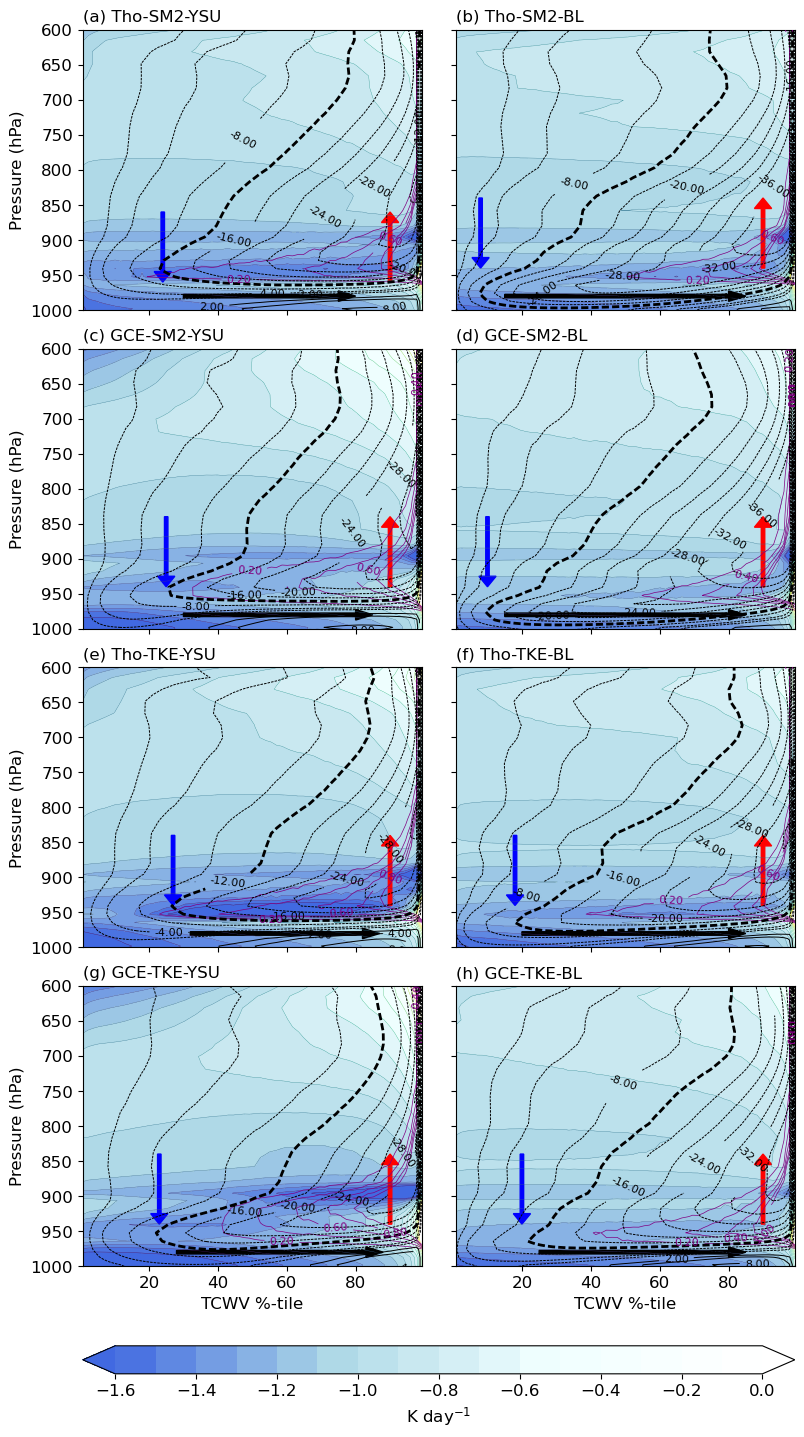

In [15]:
stas = [2]#,2,10,15,35]
ends = [5]#,7,15,20,40]
runs = ['ThoYSU','ThoBL','GCEYSU','GCEBL','ThoTYSU','ThoTBL','GCETYSU','GCETBL']
cmap=LinearSegmentedColormap.from_list('', ['royalblue','lightblue','azure','white'])
sfleves = [-36,-32,-28,-24,-20,-16,-12,-8,-4,-2,2,4,8,16,20,24,32,36]
#sfleves = [-35,-30,-25,-20,-15,-10,-5,5]
#sfleves = [-45,-30,-15,-10,5]

for j,sta in enumerate(stas):
    fig = plt.figure(figsize=(8,16))
    gs = GridSpec(6,2,left = 0.09, right = 0.98, hspace=0.2, wspace=0.1, top = 0.92, bottom = 0.08, 
                  height_ratios = [1,1,1,1,0.01,0.1])
    titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
    runi = ['Tho-SM2-YSU','Tho-SM2-BL','GCE-SM2-YSU','GCE-SM2-BL',
            'Tho-TKE-YSU','Tho-TKE-BL','GCE-TKE-YSU','GCE-TKE-BL']
    for i,run in enumerate(runs):
        df = pd.read_csv(mdir+'/circulation_Qrad/'+run+'_net_Qrad_'+str(sta)+'_'+str(ends[j])+'.csv')
        df = df.drop('Unnamed: 0', axis = 1)
        cdf = pd.read_csv(mdir+'/circulation_Qrad/'+run+'_wvel_Qrad_'+str(sta)+'_'+str(ends[j])+'.csv')
        cdf = cdf.drop('Unnamed: 0', axis = 1)
        qldf = pd.read_csv(mdir+'circulation/'+run+'_ql_'+str(sta)+'_'+str(ends[j])+'.csv')
        qldf = qldf.drop('Unnamed: 0', axis = 1)
        ax = plt.subplot(gs[i])
        im = plt.contourf(hovx, np.array(znu), np.array(df)*86400, cmap = cmap, 
                          levels = np.arange(-1.6,0.1,0.1), extend = 'both')
        plt.contour(hovx, np.array(znu), np.array(df)*86400, levels = np.arange(-1.6,0.1,0.1), 
                    linewidths = 0.25)
        cssf = plt.contour(hovx,np.array(znu),np.array(cdf)*100, colors = 'k', 
                           levels=sfleves,linewidths = 0.7)
        plt.clabel(cssf, fontsize=8, inline=1,fmt = '%1.2f')
        qlsf = plt.contour(hovx, np.array(znu),np.array(qldf)*1e5, linewidths = 0.5, colors = 'purple', 
                           levels = qllevs)
        plt.clabel(qlsf, fontsize=8, inline=1,fmt = '%1.2f', levels = qllevs)
        plt.ylim(1000,600)
        cssf.collections[6].set_linewidth(2)
        if i == 0:
            plt.arrow(30, 980, 50, 0, length_includes_head=True, 
                      head_width=15, head_length = 5, width = 5, fc='k', ec='k')
            #plt.arrow(85, 850, -50, 0, length_includes_head=True, 
            #          head_width=15, head_length = 5, width = 5, fc='k', ec='k')
            plt.arrow(90, 960, 0, -100, length_includes_head=True, 
                      head_width=5, head_length = 15, width = 1, fc='red', ec='red')
            plt.arrow(24, 860, 0, 100, length_includes_head=True, 
                      head_width=5, head_length = 15, width = 1, fc='blue', ec='blue')
        if i == 1:
            plt.arrow(15, 980, 70, 0, length_includes_head=True, 
                      head_width=15, head_length = 5, width = 5, fc='k', ec='k')
            #plt.arrow(85, 700, -70, 0, length_includes_head=True, 
            #          head_width=15, head_length = 5, width = 5, fc='k', ec='k')
            plt.arrow(90, 940, 0, -100, length_includes_head=True, 
                      head_width=5, head_length = 15, width = 1, fc='red', ec='red')
            plt.arrow(8, 840, 0, 100, length_includes_head=True, 
                      head_width=5, head_length = 15, width = 1, fc='blue', ec='blue')
        if i == 2:
            plt.arrow(30, 980, 55, 0, length_includes_head=True, 
                      head_width=15, head_length = 5, width = 5, fc='k', ec='k')
            #plt.arrow(85, 700, -70, 0, length_includes_head=True, 
            #          head_width=15, head_length = 5, width = 5, fc='k', ec='k')
            plt.arrow(90, 940, 0, -100, length_includes_head=True, 
                      head_width=5, head_length = 15, width = 1, fc='red', ec='red')
            plt.arrow(25, 840, 0, 100, length_includes_head=True, 
                      head_width=5, head_length = 15, width = 1, fc='blue', ec='blue')
        if i == 3:
            plt.arrow(15, 980, 70, 0, length_includes_head=True, 
                      head_width=15, head_length = 5, width = 5, fc='k', ec='k')
            #plt.arrow(85, 700, -70, 0, length_includes_head=True, 
            #          head_width=15, head_length = 5, width = 5, fc='k', ec='k')
            plt.arrow(90, 940, 0, -100, length_includes_head=True, 
                      head_width=5, head_length = 15, width = 1, fc='red', ec='red')
            plt.arrow(10, 840, 0, 100, length_includes_head=True, 
                      head_width=5, head_length = 15, width = 1, fc='blue', ec='blue')
        if i == 4:
            plt.arrow(32, 980, 55, 0, length_includes_head=True, 
                      head_width=15, head_length = 5, width = 5, fc='k', ec='k')
            #plt.arrow(85, 700, -70, 0, length_includes_head=True, 
            #          head_width=15, head_length = 5, width = 5, fc='k', ec='k')
            plt.arrow(90, 940, 0, -100, length_includes_head=True, 
                      head_width=5, head_length = 15, width = 1, fc='red', ec='red')
            plt.arrow(27, 840, 0, 100, length_includes_head=True, 
                      head_width=5, head_length = 15, width = 1, fc='blue', ec='blue')
        if i == 5:
            plt.arrow(20, 980, 65, 0, length_includes_head=True, 
                      head_width=15, head_length = 5, width = 5, fc='k', ec='k')
            #plt.arrow(85, 700, -65, 0, length_includes_head=True, 
            #          head_width=15, head_length = 5, width = 5, fc='k', ec='k')
            plt.arrow(90, 940, 0, -100, length_includes_head=True, 
                      head_width=5, head_length = 15, width = 1, fc='red', ec='red')
            plt.arrow(18, 840, 0, 100, length_includes_head=True, 
                      head_width=5, head_length = 15, width = 1, fc='blue', ec='blue')
        if i == 6:
            plt.arrow(28, 980, 60, 0, length_includes_head=True, 
                      head_width=15, head_length = 5, width = 5, fc='k', ec='k')
            #plt.arrow(85, 700, -65, 0, length_includes_head=True, 
            #          head_width=15, head_length = 5, width = 5, fc='k', ec='k')
            plt.arrow(90, 940, 0, -100, length_includes_head=True, 
                      head_width=5, head_length = 15, width = 1, fc='red', ec='red')
            plt.arrow(23, 840, 0, 100, length_includes_head=True, 
                      head_width=5, head_length = 15, width = 1, fc='blue', ec='blue')
        if i == 7:
            plt.arrow(25, 980, 60, 0, length_includes_head=True, 
                      head_width=15, head_length = 5, width = 5, fc='k', ec='k')
            #plt.arrow(85, 700, -65, 0, length_includes_head=True, 
            #          head_width=15, head_length = 5, width = 5, fc='k', ec='k')
            plt.arrow(90, 940, 0, -100, length_includes_head=True, 
                      head_width=5, head_length = 15, width = 1, fc='red', ec='red')
            plt.arrow(20, 840, 0, 100, length_includes_head=True, 
                      head_width=5, head_length = 15, width = 1, fc='blue', ec='blue')
        plt.title(titles[i]+' '+runi[i], loc = 'left')
        if i == 0 or i == 2 or i == 4 or i == 6:
            plt.ylabel('Pressure (hPa)', fontsize =12)
            plt.yticks(fontsize=12)
        else:
            ax.yaxis.set_major_formatter(NullFormatter())
        if i > 5:
            plt.xlabel('TCWV %-tile', fontsize = 12)
            plt.xticks(fontsize=12)
        else: 
            ax.xaxis.set_major_formatter(NullFormatter())

    cax = plt.subplot(gs[5,0:])
    cbar = plt.colorbar(im, cax = cax, orientation = 'horizontal', ticks = np.arange(-1.6,0.1,0.2))
    cbar.set_label('K day$^{-1}$', fontsize = 12)
    cbar.ax.tick_params(labelsize=12)

    plt.savefig(mdir+'plots/All_PBL_NS_rad_cooling_tot_Wcirc_'+str(sta)+'_'+str(ends[j])+'.jpg',
                    bbox_inches = 'tight', dpi = 300)
    plt.savefig(mdir+'plots/All_PBL_NS_rad_cooling_tot_Wcirc_'+str(sta)+'_'+str(ends[j])+'.pdf', 
                    bbox_inches = 'tight', dpi = 300)
    plt.show()
    plt.close()

# Anomaly with real Psi

In [ ]:
stas = [2,2,10,15,35]
ends = [5,7,15,20,40]
cmap=LinearSegmentedColormap.from_list('', ['royalblue','lightblue','white','orange','red'])
runs = ['ThoYSU','ThoBL','GCEYSU','GCEBL','ThoTYSU','ThoTBL','GCETYSU','GCETBL']

for j,sta in enumerate(stas):
    fig = plt.figure(figsize=(8,16))
    gs = GridSpec(6,2,left = 0.09, right = 0.98, hspace=0.2, wspace=0.1, top = 0.92, bottom = 0.08, 
                  height_ratios = [1,1,1,1,0.01,0.1])
    titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
    runi = ['Tho-SM2-YSU','Tho-SM2-BL','GCE-SM2-YSU','GCE-SM2-BL',
            'Tho-TKE-YSU','Tho-TKE-BL','GCE-TKE-YSU','GCE-TKE-BL']
    for i,run in enumerate(runs):
        df = pd.read_csv(mdir+'/circulation/'+run+'_net_'+str(sta)+'_'+str(ends[j])+'.csv')
        df = df.drop('Unnamed: 0', axis = 1)
        cdf = pd.read_csv(mdir+'/circulation_Qrad/'+run+'_wvel_Qrad_'+str(sta)+'_'+str(ends[j])+'.csv')
        cdf = cdf.drop('Unnamed: 0', axis = 1)
        qldf = pd.read_csv(mdir+'circulation/'+run+'_ql_'+str(sta)+'_'+str(ends[j])+'.csv')
        qldf = qldf.drop('Unnamed: 0', axis = 1)
        ax = plt.subplot(gs[i])
        im = plt.contourf(hovx, np.array(znu), np.array(df)*86400, cmap = 'bwr', 
                          levels = np.arange(-0.4,0.41,0.04), extend = 'both')
        cssf = plt.contour(hovx,np.array(znu),np.array(cdf)*100, colors = 'k', 
                           levels = sfleves, linewidths = 0.7)
        plt.clabel(cssf, fontsize=8, inline=1,fmt = '%1.2f')
        qlsf = plt.contour(hovx, np.array(znu),np.array(qldf)*1e5, linewidths = 0.5, colors = 'purple', 
                           levels = qllevs)
        plt.clabel(qlsf, fontsize=8, inline=1,fmt = '%1.2f', levels = qllevs)
        plt.ylim(1000,800)
        plt.title(titles[i]+' '+runi[i], loc = 'left')
        if i == 0 or i == 2 or i == 4 or i == 6:
            plt.ylabel('Pressure (hPa)', fontsize =12)
            plt.yticks(fontsize=12)
        else:
            ax.yaxis.set_major_formatter(NullFormatter())
        if i > 5:
            plt.xlabel('TCWV %-tile', fontsize = 12)
            plt.xticks(fontsize=12)
        else: 
            ax.xaxis.set_major_formatter(NullFormatter())

    cax = plt.subplot(gs[5,0:])
    cbar = plt.colorbar(im, cax = cax, orientation = 'horizontal')
    cbar.set_label('K day$^{-1}$', fontsize = 12)
    cbar.ax.tick_params(labelsize=12)

    plt.savefig(mdir+'plots/All_PBL_NS_rad_cooling_anom_Wcirc_'+str(sta)+'_'+str(ends[j])+'.jpg',
                    bbox_inches = 'tight', dpi = 300)
    plt.savefig(mdir+'plots/All_PBL_NS_rad_cooling_anom_Wcirc_'+str(sta)+'_'+str(ends[j])+'.pdf', 
                    bbox_inches = 'tight', dpi = 300)
    #plt.show()
    plt.close()

In [ ]:
runs = ['Tho','GCE','ThoT','GCET']
color_ysu = ['darkblue','steelblue','darkblue','steelblue']
color_bl = ['pink','red','pink','red']
lab_ysu = ['Tho-SM2-YSU','Tho-TKE-YSU','GCE-SM2-YSU','GCE-TKE-YSU']
lab_bl = ['Tho-SM2-BL','Tho-TKE-BL','GCE-SM2-BL','GCE-TKE-BL']
linestyle = ['-','-','--','--']
titles = ['(a)','(b)','(c)','(d)']

fig = plt.figure(figsize=(8,4))
gs = GridSpec(1,4,left = 0.09, right = 0.98, hspace=0.2, wspace=0.2, top = 0.92, bottom = 0.08)
for i,run in enumerate(runs):
    ax = plt.subplot(gs[i])
    df = pd.read_csv(mdir+'/circulation_Qrad/'+run+'YSU_net_Qrad_2_5.csv')
    df = df.drop('Unnamed: 0', axis = 1)
    t_ysu = df.mean(axis=1)
    df_bl = pd.read_csv(mdir+'/circulation_Qrad/'+run+'BL_net_Qrad_2_5.csv')
    df_bl = df_bl.drop('Unnamed: 0', axis = 1)
    t_bl = df_bl.mean(axis=1)
    texto = 1 - (t_bl[4:12]*86400).sum()/(t_ysu[4:12]*86400).sum()
    plt.plot(t_ysu*86400,znu, color  = color_ysu[i], linestyle = linestyle[i], label = lab_ysu[i])
    plt.plot(t_bl*86400,znu, color  = color_bl[i], linestyle = linestyle[i], label = lab_bl[i])
    plt.ylim(1009,800)
    plt.title(titles[i], loc = 'left')#+' '+str(int(texto*100))+'%', loc = 'left')
    plt.xlim(-1.7,-0.75)
    plt.xlabel('Net Q$_{rad}$')
    plt.legend(frameon = False, loc = 'upper left')
    if i < 1:
        plt.ylabel('Pressure (hPa)')
    else:
        ax.yaxis.set_major_formatter(NullFormatter())
    #plt.xlim(-2.5,-1.5)
plt.savefig('/Users/Casi94/Documents/PhD/Thesis/Plots/Rad_cooling_prof.jpg',bbox_inches='tight',dpi=300)
plt.savefig('/Users/Casi94/Documents/PhD/Thesis/Plots/Rad_cooling_prof.pdf',bbox_inches='tight',dpi=300)